In [2]:
import numpy as np
from scipy.spatial import distance


def activity_vector_rdm(activity_vectors):
    num_vectors = len(activity_vectors)
    dissimilarity_matrix = np.zeros((num_vectors, num_vectors))

    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            
            correlation = np.corrcoef(activity_vectors[i], activity_vectors[j])[0, 1]
            
            dissimilarity = 1.0 - correlation

            dissimilarity_matrix[i, j] = dissimilarity
            dissimilarity_matrix[j, i] = dissimilarity

    return dissimilarity_matrix



In [3]:
import os
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from nilearn import image, datasets, plotting, masking
import pandas as pd
from scipy.spatial import distance



def plot_rdm(rdm_data, image_labels=None, title="RDM", cmap="viridis", xlabel="Image", ylabel="Image", cbar_label="Dissimilarity"):    
        
    # Create the plot
    plt.imshow(rdm_data)
    plt.xlabel("Image", fontsize=15)
    plt.ylabel("Image", fontsize=15)
    
    plt.title("RDM", fontsize=20)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Dissimilarity', fontsize=15)
    plt.show()



Correlation Dissimilarity Matrix:
[[0.         0.1481333  0.14193323 ... 0.08122659 0.26074619 0.14995688]
 [0.1481333  0.         0.10693532 ... 0.14796253 0.1793048  0.21123232]
 [0.14193323 0.10693532 0.         ... 0.12182546 0.13701788 0.18071485]
 ...
 [0.08122659 0.14796253 0.12182546 ... 0.         0.18140869 0.12922116]
 [0.26074619 0.1793048  0.13701788 ... 0.18140869 0.         0.21173994]
 [0.14995688 0.21123232 0.18071485 ... 0.12922116 0.21173994 0.        ]]


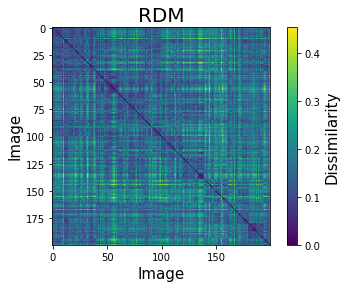

In [4]:
import csv
fc7_path = "fc7.csv"

activity_vectors_fc7 = []


with open(fc7_path, mode='r') as csv_file:
    
    csv_reader = csv.reader(csv_file)
    
    num_columns = len(next(csv_reader))
    
    column_lists = [[] for x in range(num_columns)]
    
    csv_file.seek(0)
    
    for row in csv_reader:
        for i, value in enumerate(row):
            try:
                number = float(value) 
                column_lists[i].append(number)
            except ValueError:
                pass  

activity_vectors_fc7.extend(column_lists)

rdm_data_fc7 = activity_vector_rdm(activity_vectors_fc7)
print("Correlation Dissimilarity Matrix:")
print(rdm_data_fc7)

plot_rdm(rdm_data_fc7)

Correlation Dissimilarity Matrix:
[[0.         0.11570398 0.10952768 ... 0.08736218 0.19389351 0.11498699]
 [0.11570398 0.         0.09330895 ... 0.11367729 0.1584472  0.14382789]
 [0.10952768 0.09330895 0.         ... 0.11668052 0.13326609 0.13716891]
 ...
 [0.08736218 0.11367729 0.11668052 ... 0.         0.14683805 0.10237063]
 [0.19389351 0.1584472  0.13326609 ... 0.14683805 0.         0.15881274]
 [0.11498699 0.14382789 0.13716891 ... 0.10237063 0.15881274 0.        ]]


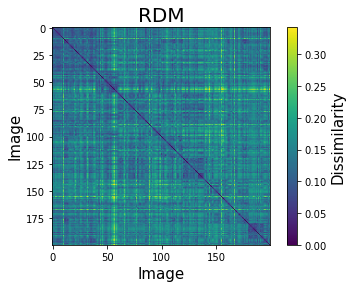

In [5]:
import csv
fc6_path = "fc6.csv"

# Example usage:
activity_vectors_fc6 = []


with open(fc6_path, mode='r') as csv_file:
    
    csv_reader = csv.reader(csv_file)
    
    num_columns = len(next(csv_reader))
    
    column_lists = [[] for x in range(num_columns)]
    
    csv_file.seek(0)
    
    for row in csv_reader:
        for i, value in enumerate(row):
            try:
                number = float(value)
                column_lists[i].append(number)
            except ValueError:
                pass  

activity_vectors_fc6.extend(column_lists)

rdm_data_fc6 = activity_vector_rdm(activity_vectors_fc6)
print("Correlation Dissimilarity Matrix:")
print(rdm_data_fc6)

plot_rdm(rdm_data_fc6)

In [12]:
from scipy.stats import spearmanr

spearman_corr = spearmanr(rdm_data_fc6.flatten(),rdm_data_fc7.flatten())

print(spearman_corr)

SpearmanrResult(correlation=0.9017102367011334, pvalue=0.0)


Correlation Dissimilarity Matrix:
[[0.         0.33031925]
 [0.33031925 0.        ]]


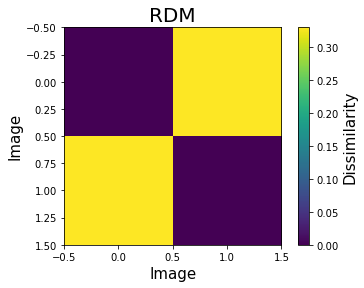

In [6]:
feature_comparison=[rdm_data_fc6,rdm_data_fc7]
rdm_data_features = activity_vector_rdm(feature_comparison)
print("Correlation Dissimilarity Matrix:")
print (rdm_data_features)
plot_rdm(rdm_data_features)



In [14]:
nodes = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'getattr', 'getitem', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7', 'fc8_euclidean']
import csv

for y in nodes:
    fc7_path = str(y)+".csv"

    activity_vectors_fc7 = []


    with open(fc7_path, mode='r') as csv_file:
        
        csv_reader = csv.reader(csv_file)
        
        num_columns = len(next(csv_reader))
        
        column_lists = [[] for x in range(num_columns)]
        
        csv_file.seek(0)
        
        for row in csv_reader:
            for i, value in enumerate(row):
                try:
                    number = float(value) 
                    column_lists[i].append(number)
                except ValueError:
                    pass  

    activity_vectors_fc7.extend(column_lists)

    rdm_data_fc7 = activity_vector_rdm(activity_vectors_fc7)
    print("Correlation Dissimilarity Matrix:")
    print(rdm_data_fc7)

    plot_rdm(rdm_data_fc7)

FileNotFoundError: [Errno 2] No such file or directory: 'x.csv'

In [7]:
r = np.corrcoef(rdm_data_fc6,rdm_data_fc7)

print (r)



[[ 1.          0.66968075  0.7001327  ...  0.87460926 -0.40351605
   0.69265156]
 [ 0.66968075  1.          0.7528812  ...  0.64458417 -0.01811901
   0.37110507]
 [ 0.7001327   0.7528812   1.         ...  0.55862814  0.06845539
   0.40593475]
 ...
 [ 0.87460926  0.64458417  0.55862814 ...  1.         -0.2448405
   0.77789246]
 [-0.40351605 -0.01811901  0.06845539 ... -0.2448405   1.
  -0.27422213]
 [ 0.69265156  0.37110507  0.40593475 ...  0.77789246 -0.27422213
   1.        ]]


In [9]:
import matplotlib.pyplot as plt

im_9=[154587, 290400, 290400, 69984, 69984, 186624, 186624, 43264, 43264, 64896, 64896, 64896, 64896, 43264, 43264, 9216, 9216, 4096, 4096, 4096, 4096, 4096, 4096, 1]
im_3=[154587, 290400, 290400, 69984, 69984, 186624, 186624, 43264, 43264, 64896, 64896, 64896, 64896, 43264, 43264, 9216, 9216, 4096, 4096, 4096, 4096, 4096, 4096, 1]

x = np.array(im_9)
y = np.array(im_3)

a, b = np.polyfit(x, y, 1) 


In [10]:
x=[154587, 290400, 290400, 69984, 69984, 186624, 186624, 43264, 43264, 64896, 64896, 64896, 64896, 43264, 43264, 9216, 9216, 4096, 4096, 4096, 4096, 4096, 4096, 1]
y=[154587, 290400, 290400, 69984, 69984, 186624, 186624, 43264, 43264, 64896, 64896, 64896, 64896, 43264, 43264, 9216, 9216, 4096, 4096, 4096, 4096, 4096, 4096, 1]

r = np.corrcoef(x, y)

s = 1-r

print (s)

[[2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16]]


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

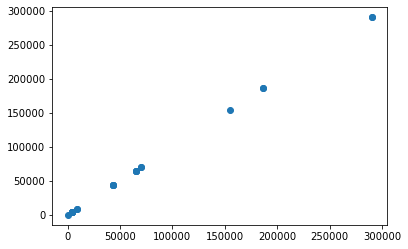

In [11]:

ax = plt.axes
plt.scatter(x,y)
plt.plot(x, a*x+b)  
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.show()